# 1. Matrix multiplication (8pt)

### 1. (6pt) Multiply these matrices/vectors manually. Show the math you do while solving these.
#### Note: you can do this on paper, just include a picture of your solution.
##### a. 
$$\begin{bmatrix} (0*1)+(7*0) & (0*0)+(7*-1) \\ (5*1)+(3*0) & (5*0)+(-1*3) \end{bmatrix}$$
$$\begin{bmatrix} 0 & -7 \\ 5 & -3 \end{bmatrix}$$
##### b. 
We are not able to multiple the matrices because the columns in the first matrix does not equal the rows in the sexond matrix
##### c.
$$\begin{bmatrix} (0*1)+(7*0) & (0*0)+(7*-1) & (0*0)+(7*1) \\ (5*1)+(3*0) & (5*0)+(3*-1) & (5*0)+(3*1) \end{bmatrix}$$
$$\begin{bmatrix} 0 & -7 & 7 \\ 5 & -3 & 3 \end{bmatrix}$$
### 2. (2pt) now check your results on computer. You should get the same results.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
np.array([[0,7],[5,3]]) @ np.array([[1,0],[0,-1]])

array([[ 0, -7],
       [ 5, -3]])

In [34]:
np.array([[0,7],[5,3]]) @ np.array([[1,0],[0,-1],[0,1]])
# not possible because number of cols in first matrix != to number of rows in second matrix

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [35]:
np.array([[0,7],[5,3]]) @ np.array([[1,0,0],[0,-1,1]])

array([[ 0, -7,  7],
       [ 5, -3,  3]])

# 2. Rotate Crazy Hat (21pt)

### 1. (1pt) Read the data points from “crazy_hat.tsv” (available on canvas) from disk.

In [36]:
ch = pd.read_csv("../data/crazy-hat.tsv", sep="\t") 
ch.head()

,x,y,group
0,0,22,outline
1,16,-18,outline
2,-16,-18,outline
3,0,22,outline
4,-3,7,leye


### 2. (3pt) Separate data into a coordinate matrix (call this X) and group id-s (call this groups). You can get matrix out of data frame columns with the .values attribute.

In [37]:
X = ch[["x", "y"]].values
groups = ch.group.values

### 3. (5pt) Plot the figure: plot all x-y pairs and sequentially connect the dots. Pay attention to connect correct groups but not to connect wrong groups.
#### Hint: you can do this by a loop over unique group values (remember np.unique), and by plotting and connecting only points for this group inside the loop.
#### Hint 2: normally data plotting does not care about x/y scales.

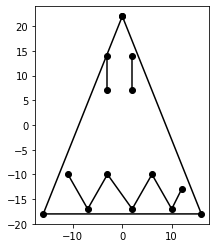

In [38]:
ax = plt.axes() 
u_group = np.unique(groups)
for g in u_group:
    a = ch[ch.group == g]
    ax.set_aspect("equal") 
    ax.plot(a.x, a.y, marker="o",color="black")

### 4. (4pt) Convert your plotting code into a function that takes two (or more if you wish, like color, image size, etc) arguments: X and groups. Demonstrate that the function works with Crazy Hat data.

In [41]:
def plot(X, groups):
    ax = plt.axes() 
    u_group = np.unique(groups)
    for g in u_group:
        a = X[groups == g]
        ax.set_aspect("equal") 
        ax.plot(a[:,0], a[:,1], marker="o",color="black")

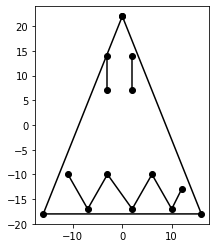

In [42]:
plot(X, groups)

### 5. (4pt) Now create a function Rot that takes the angle α, and returns the rotation matrix to rotate image by this angle. Check out np.sin, np.cos, and remember that radians = π · degrees/180

In [43]:
def Rot(alpha):
    a = alpha*np.pi/180
    ca = np.cos(a)
    sa = np.sin(a)
    return np.array([[ca, -sa], [sa, ca]])

### 6. (4pt) Now rotate the Crazy Hat figure. Select a few different angles of your choice. Remember that matrix multiplication sign is @, not *!

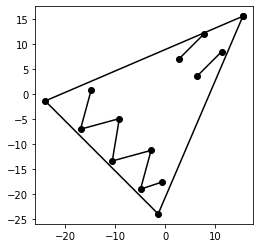

In [44]:
plot(X @ Rot(45), groups)

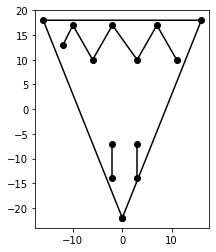

In [45]:
plot(X @ Rot(180), groups)

# 3. Linear transformation of images (26pt)

## 3.1 Flipping (mirroring) image (13pt)

### 1. (6pt) Construct the “flip-x” matrix Fx. It should be a 2 × 2 matrix that inverses the x-components while leaving y-components intact. You can think in terms of generic matrix multiplication.
#### Hint: you can take the unit matrix as the point of departure and see which elements you have to modify to get flip-x instead.

In [46]:
Fx = np.array([[-1,0],[0, 1]]) 

### 2. (5pt) Why should Fx be a 2 × 2 matrix?
#### Hint: try something else, e.g. 2 × 3 or 3 × 2 matrix. What is the result?

Fx can't be a 3x2 matrix because the columns in the first matrix must match the rows in the second matrix. Our first matrix (X) has 2 columns, and this matrix would have 3 rows. These don't match, so it will give out an error.

Fx can't be a 2x3 matrix because the result will have 3 data points. For example, instead of only resulting in a (x,y) answer, it becomes an (x,y,z).

So, Fx should be a 2x2 matrix.

### 3. (2pt) Demonstrate that your Fx flips Crazy Hat image. (Note: Crazy Hat is slightly asymmetric.)

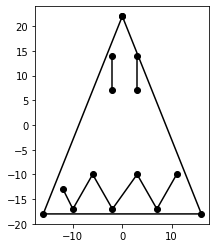

In [47]:
plot(X @ Fx, groups)

## 3.2 Stretch image (13pt)
### 1. (5pt) Create the “stretch-y” matrix Sy(s) where s is the “stretch factor”, 2 in the example above. Exactly as a above, it should be a 2 × 2 matrix that stretches the y-components while leaving x-components untouched.

In [48]:
def stretchy(factor):
    return np.array([[1,0],[0,factor]])

### 2. (2pt) Demonstrate that your matrix works correctly by stretching Crazy Hat vertically by factor 2.

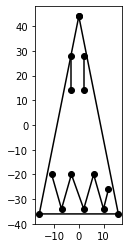

In [49]:
plot(X @ stretchy(2), groups)

### 3. (7pt) Finally, let’s combine these transformation. Use Crazy Hat to perform the following operations: flip along the 45◦-line, and stretch it 2× along the 45◦-line (see the example below). I have in mind the 45° line that to SE.

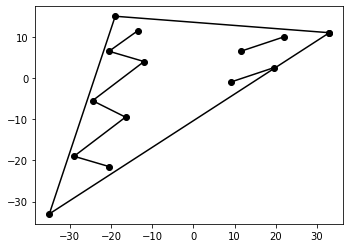

In [50]:
plot(X @ Rot(-45) @ Fx @ stretchy(2) @ Rot(45) , groups)

# 4. Rotate Krazy Kat (27 points)

### 1. (5 × 3pt) Get the code to run and understand what it does. In particular

#### (a) Get the code to run

shape: (90, 100)


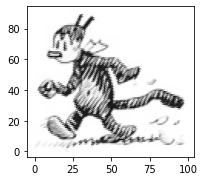

In [18]:
from matplotlib.image import imread
img = imread('../data/krazy-kat-100.png')
# note: rows * columns (not width * height!)
print("shape:", img.shape)
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0], 0, -1)) 
X = np.column_stack((xx.ravel(), yy.ravel()))
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=img.ravel(), marker=".",cmap="Greys_r") 
ax.set_aspect("equal")
plt.show()

#### (b) What is the matrix X that is made by stacking?

X contains the (x,y) coordinates of the image. In other words, the horizontal and vertical positions of each pixel.

#### (c) How many rows does X have? What does it mean, why does it have this many rows it has?

In [19]:
len(X)

9000

X has 9,000 rows. This means that there are 9,000 pixels in the image.

#### (d) A few lines of X may look like...(refer to PS3 assignment). What do these three lines denote?

These 3 points means creates a straight line.

#### (e) What is img matrix? If may contain values like (0.9882353, 0.99215686, 0.99607843, 1). What do these values denote?
The image matrix is just the darkness of the colors.

Those values represents the darkness of the color. Depending on the computer, the closer it is to the number 1, the darker it will be.

### 2. (8pt) Now use matrix multiplication to rotate this image by a few different angles. Note: use matrix rotation we did above, various image libraries will not count!
#### Suggestion: when you use the code like shown above, it may result in large and slow pdf (or html) files. You can make the pdf faster by:
#### (a) instead of plt.show, save the image into a jpg or png file. (b) put the resulting saved file into your pdf/html.

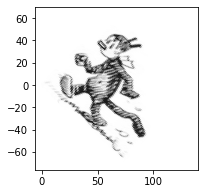

In [20]:
X = X @ Rot(45)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=img.ravel(), marker=".",cmap="Greys_r") 
ax.set_aspect("equal")
plt.show()

### 3. (4pt) Use also other transforms (Fx and Sy) to manipulate the image.

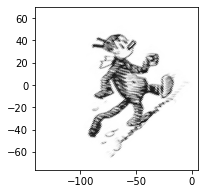

In [21]:
X = X @ Fx
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=img.ravel(), marker=".",cmap="Greys_r") 
ax.set_aspect("equal")
plt.show()

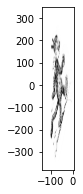

In [22]:
X = X @ stretchy(5)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=img.ravel(), marker=".",cmap="Greys_r") 
ax.set_aspect("equal")
plt.show()

# 5. Linear Regression (18pt)

### 1. (1pt) Load boston housing data.

In [23]:
boston = pd.read_csv("../data/boston.csv.bz2", sep="\t")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 2. (3pt) Run a linear regression model in the form medvi +β0 +β1 ·rmi +β2 ·lstati +β3 ·zni +εi (2)

In [24]:
import statsmodels.formula.api as smf
smf.ols("medv ~ rm + lstat + zn", data=boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     297.3
Date:                Sat, 23 Apr 2022   Prob (F-statistic):          6.65e-111
Time:                        23:42:41   Log-Likelihood:                -1581.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     502   BIC:                             3189.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4606      3.171     -0.461      0.645      -7.691       4.770
rm             5.0455      0.446     11.324      0.000       4.170       5.921
lstat         -0.6240      0.046    -13.644      0.000      -0.714      -0.534
zn             0.0158      0.012      1.359      0.175      -0.007       0.039
==============================================================================
Omnibus:                      150.432   Durbin-Watson:                   0.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.567
Skew:                           1.376   Prob(JB):                    1.34e-106
Kurtosis:                       6.943   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. (8pt) Next, the most complex task–create the design matrix X for this regression model. You have to create a matrix that contains four columns: a) column of ones, and b) three columns of the variables you use in the model.

In [25]:
X = boston[["rm", "lstat", "zn"]].values
len(X)

506

In [26]:
ones = np.ones(shape=(len(X), 1))

In [27]:
X = np.column_stack((ones, X))
X

array([[ 1.   ,  6.575,  4.98 , 18.   ],
       [ 1.   ,  6.421,  9.14 ,  0.   ],
       [ 1.   ,  7.185,  4.03 ,  0.   ],
       ...,
       [ 1.   ,  6.976,  5.64 ,  0.   ],
       [ 1.   ,  6.794,  6.48 ,  0.   ],
       [ 1.   ,  6.03 ,  7.88 ,  0.   ]])

### 4. (2pt) Create the outcome vector y. Just transform the medv column to a vector. (In R it will be vector anyway.)

In [28]:
y = boston[["medv"]].values
len(y)

506

### 5. (3pt) Compute the solution–your estimate for the parameter vector β using (1).
#### Hint: numpy inverts matrix with function np.linalg.inv, in R you can use solve.

In [29]:
(np.linalg.inv(X.T @ X) @ X.T) @ y

array([[-1.46057734],
       [ 5.04554308],
       [-0.62401045],
       [ 0.01580778]])

### 6. (1pt) Compare the results–your computed β estimate should be exactly the same that you see in the linear regression table.

The results I got were exactly the same as the one in the linear regression table!

# Finally... How much time did you spend on this PS?
I spent around 6 hours on this PS